In [11]:
# this files will take about 200 second (as mentioned in the problem statement) to run. 
# It may take more than 200 second depending upon the configuration of the PC.


import sympy as sp
from sympy import *
import math as mt

## define the function to find the transformation matrix
def tran(a,alpha,d,theta):

    ## rot@z*trans@z*trans@x*rot@z
    A = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0 ], [sp.sin(theta), sp.cos(theta), 0, 0 ], [0 , 0, 1, 0], [0, 0, 0, 1]])@sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d],[0, 0, 0, 1]])@sp.Matrix([[1, 0, 0, a],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])@sp.Matrix([[1, 0, 0, 0], [0, sp.cos(alpha), -sp.sin(alpha), 0], [0, sp.sin(alpha), sp.cos(alpha), 0],[ 0, 0, 0, 1]])
    return A

##define the final transformation matrix
##we will take theta3(t3) =  zero whenever we use this function in code since it is locked

def finalTransformation(t1, t2, t3, t4, t5, t6, t7):
    
    ##transformation of frame 1 to 7 by passing DH parameter to tran function
    A1 = tran(0,sp.pi/2,0.360,t1)
    A2 = tran(0,-sp.pi/2,0,t2)
    A3 = tran(0,-sp.pi/2,0.420,t3)
    A4 = tran(0,sp.pi/2,0,t4)
    A5 = tran(0,sp.pi/2,0.3995,t5)
    A6 = tran(0,-sp.pi/2,0,t6)
    A7 = tran(0,0,0.1055,t7)
    A = A1@A2@A3@A4@A5@A6@A7
    return A


In [12]:
## define the function to find f
def jacobian(t1, t2, t3, t4, t5, t6, t7):
    
    ##transformation of frame 1 to 7 by passing DH parameter to tran function
    A1 = tran(0,sp.pi/2,0.360,t1)
    A2 = tran(0,-sp.pi/2,0,t2)
    A3 = tran(0,-sp.pi/2,0.420,t3)
    A4 = tran(0,sp.pi/2,0,t4)
    A5 = tran(0,sp.pi/2,0.3995,t5)
    A6 = tran(0,-sp.pi/2,0,t6)
    A7 = tran(0,0,0.1055,t7)
    
    ##transformation of each frame WRT to base frame
    T01 = A1
    T02 = A1@A2
    T03 = A1@A2@A3
    T04 = A1@A2@A3@A4
    T05 = A1@A2@A3@A4@A5
    T06 = A1@A2@A3@A4@A5@A6
    T07 = A1@A2@A3@A4@A5@A6@A7    

    #origin of frame 0
    O0 = sp.Matrix([[0],[0],[0]]) ## origin of 0th frame should be [0,0,0]
    #origin of frame 1
    O1 = T01[0:3,3]      
    #origin of frame 2
    O2 = T02[0:3,3]      
    #origin of frame 3
    O3 = T03[0:3,3]      
    #origin of frame 4
    O4 = T04[0:3,3]      
    #origin of frame 5
    O5 = T05[0:3,3]      
    #origin of frame 6
    O6 = T06[0:3,3]      
    #origin of frome 7
    O7 = T07[0:3,3]      

    ## we will not calculate Z3 as theta3 = 0 always
    ## Z and o value for J1
    Z0 = sp.Matrix([[0],[0],[1]])
    O_0 = O7 - O0
    ## Z and o value for J2
    Z1 = T01[0:3,2]      
    O_1 = O7 - O1
    #Z and o value for J4
    Z3 = T03[0:3,2]      
    O_3 = O7 - O3
    ## Z and o value for J5
    Z4 = T04[0:3,2]      
    O_4 = O7 - O4
    ## Z and o value for J6
    Z5 = T05[0:3,2]       
    O_5 = O7 - O5
    ## Z and o value for J7
    Z6 = T06[0:3,2]       
    O_6 = O7 - O6

    #construct jacobian matrix
    J = sp.Matrix([[Z0.cross(O_0), Z1.cross(O_1), Z3.cross(O_3), Z4.cross(O_4), Z5.cross(O_5), Z6.cross(O_6)],[Z0, Z1, Z3, Z4, Z5, Z6]])
    
    return J

In [13]:
##Function to find the g vector

def g_of_t(t1,t2,t3,t4,t5,t6,t7):
    
    ##Define theta1 ~ theta7 symbolically
    T1, T2, T3, T4, T5, T6, T7 = symbols ('T1 T2 T3 T4 T5 T6 T7')
    
    ##Transformation of frame 1 to 7 by passing DH parameter to tran function
    A1 = tran(0,sp.pi/2,0.360,T1)
    A2 = tran(0,-sp.pi/2,0,T2)
    A3 = tran(0,-sp.pi/2,0.420,T3)
    A4 = tran(0,sp.pi/2,0,T4)
    A5 = tran(0,sp.pi/2,0.3995,T5)
    A6 = tran(0,-sp.pi/2,0,T6)
    A7 = tran(0,0,0.1055,T7)
    
    ##Transformation of each frame WRT to base frame
    T01 = A1
    T02 = A1@A2
    T03 = A1@A2@A3
    T04 = A1@A2@A3@A4
    T05 = A1@A2@A3@A4@A5
    T06 = A1@A2@A3@A4@A5@A6
    T07 = A1@A2@A3@A4@A5@A6@A7
    
    ##Define mass for each link
    m1 = 3.95
    m2 = 7.00 ##joint 3 is locked and hence mass of link 2 = mass of link 2 + mass of link 3 
    m4 = 3.01
    m5 = 3.01
    m6 = 1.87
    m7 = 1.87
    
    ##Define position of center of mass of each link in the local frame
    cg1 = sp.Matrix([[0],[0],[0.180],[1]])
    cg2 = sp.Matrix([[0],[0.210],[0],[1]])
    cg4 = sp.Matrix([[0],[-0.19975],[0],[1]])
    cg5 = sp.Matrix([[0],[0],[0.19975],[1]])
    cg6 = sp.Matrix([[0],[0.05275],[0],[1]])
    cg7 = sp.Matrix([[0],[0],[0.05275],[1]])
    
    ##Define position of center of mass of each link in the reference frame (frame 0)
    CG1 = cg1
    CG2 = T01@cg2
    CG4 = T03@cg4
    CG5 = T04@cg5
    CG6 = T05@cg6
    CG7 = T06@cg7
    
    ##define gravitational acceleration
    G = 9.8 ##unit is m/s^2
    
    ##Total potential energy of the system
    P = m1*CG1[2]*G + m2*CG2[2]*G + m4*CG4[2]*G + m5*CG5[2]*G + m6*CG6[2]*G + m7*CG7[2]*G
    
    ##define g matrix
    g = sp.Matrix([[diff(P,T1)],[diff(P,T2)],[diff(P,T4)],[diff(P,T5)],[diff(P,T6)],[diff(P,T7)]])
    
    ##substitute the symbol with value of given theta
    g = g.subs([(T1,t1),(T2,t2),(T3,t3),(T4,t4),(T5,t5),(T6,t6),(T7,t7)])
    
    return g


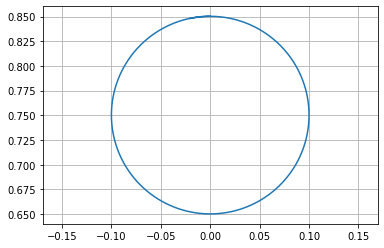

228.22417426109314


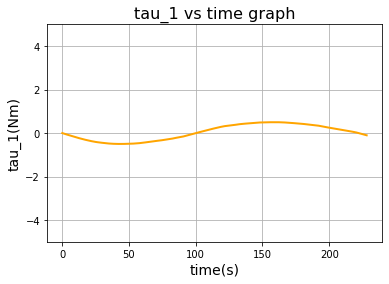

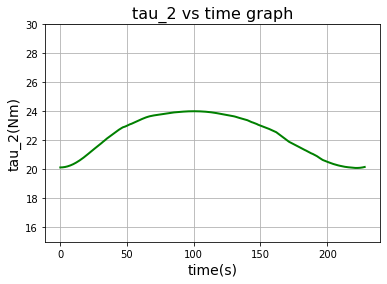

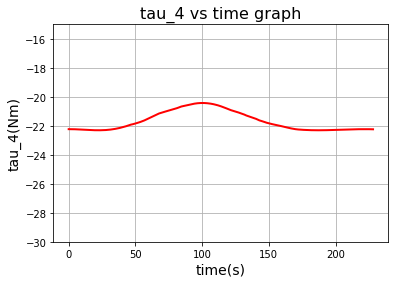

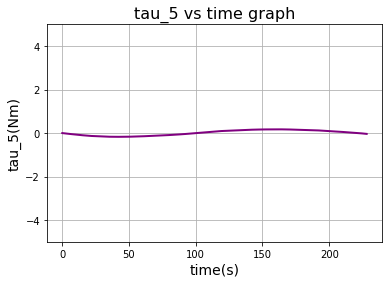

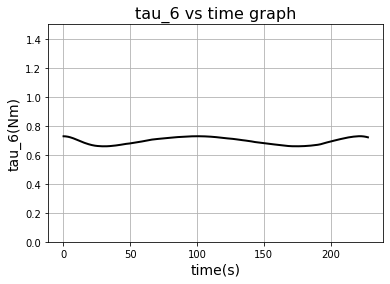

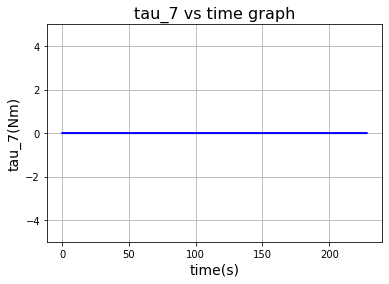

In [14]:
from matplotlib import pyplot as plt
import time
start = time.time() #start time
##joint angle vector initial configuration.Take theta5 = 2*pi/18 radian to avoid singularity. This matrix will be updated with each iteration
q = sp.Matrix([[mt.pi/2],[0],[mt.pi/2],[0],[2*mt.pi/18],[0]])

## initialise the list to store the x and z values. This value will be use for plotting the circle.
## intitate the list to store the torque values. This value will be use for plotting the graph later.
## intiate the time
x = []
z = []
tau_1 = []
tau_2 = []
tau_4 = []
tau_5 = []
tau_6 = []
tau_7 = []
t = []
for i in range (1550):  ## run this for loop for more than 100 time to make sure that circle is being perfactly drawn

    ## devide the entire circle to be drawin in 100 points
    ## theta is a angle correponding to each points
    ## theta1 will be corrosponding to the intial position
    theta1 = mt.pi/2 + (mt.pi*5/2 - mt.pi/2)*(i)/1500
    theta2 = mt.pi/2 + (mt.pi*5/2 - mt.pi/2)*(i+1)/1500
    
    ## find the transformation matrix from base to end effector in each iteration
    ## take theta3 = 0
    T07 = finalTransformation (q[0],q[1],0,q[2],q[3],q[4],q[5])

    ## position of ball point in 7th frame
    P7 = sp.Matrix([[0],[0],[0.100],[1]])

    ## position of ball point in the origin frame
    P07 = T07@P7

    ## add the value of x and z in the list at each iteration
    ## This will be used for plotting the circle later
    x.append(P07[0])
    z.append(P07[2])
    
    ## call jacobian to find the jacobian matrix for each iteration
    ## take theta3 = 0
    J = jacobian (q[0],q[1],0,q[2],q[3],q[4],q[5])
    
    ##g vector
    g = g_of_t(q[0],q[1],0,q[2],q[3],q[4],q[5])
    
    ##Force vector
    F = sp.Matrix([[0],[-5],[0],[0],[0],[0]])
    
    ## add the current time in the time lists
    t.append(time.time()-start)
    
    ## find the final tau
    tau = g - (sp.transpose(J))@F
    
    ## add the value of individual torque into the list
    tau_1.append(tau[0])
    tau_2.append(tau[1])
    tau_4.append(tau[2])
    tau_5.append(tau[3])
    tau_6.append(tau[4])
    tau_7.append(tau[5])
    #sp.pprint(tau_1)
    
    ## find the inverse jacobian
    J_inv = J.inv('LU')
    
    ## find the difference in the position of end effector in each iteration
    dx1 = sp.Matrix([[0.100*sp.cos(theta1)],[0],[0.100*sp.sin(theta1)],[0],[0],[0]]) ## current end effector position
    dx2 = sp.Matrix([[0.100*sp.cos(theta2)],[0],[0.100*sp.sin(theta2)],[0],[0],[0]]) ## next end effector position
    dx = dx2 - dx1  ## difference in the end effector position
    
    ## update the value of q 
    q = q + J_inv@dx

## plot the circle after finding x and z value at each iteration
plt.grid()
plt.plot(x,z)
plt.axis("equal")
plt.pause(0.05)
plt.show()
end = time.time()
print(end-start) # print time taken to run the code

## plot the tau_1 vs time graph
plt.ylim(-5,5)
plt.grid()
plt.plot(t,tau_1, lw = 2, color = 'orange' ) 
plt.title('tau_1 vs time graph',fontsize = 16)
plt.xlabel('time(s)', fontsize = 14)
plt.ylabel('tau_1(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_2 vs time graph
plt.ylim(15,30)
plt.grid()
plt.plot(t,tau_2, lw = 2, color = 'green')
plt.title('tau_2 vs time graph', fontsize = 16)
plt.xlabel('time(s)', fontsize = 14)
plt.ylabel('tau_2(Nm)', fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_4 vs time graph
plt.ylim(-30,-15)
plt.grid()
plt.plot(t,tau_4, lw = 2, color = 'red')
plt.title('tau_4 vs time graph', fontsize = 16)
plt.xlabel('time(s)', fontsize = 14)
plt.ylabel('tau_4(Nm)', fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_5 vs time graph
plt.ylim(-5,5)
plt.grid()
plt.plot(t,tau_5, lw = 2, color = 'purple')
plt.title('tau_5 vs time graph',fontsize = 16)
plt.xlabel('time(s)', fontsize = 14)
plt.ylabel('tau_5(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_6 vs time graph
plt.ylim(0,1.5)
plt.grid()
plt.plot(t,tau_6, lw = 2, color = 'black')
plt.title('tau_6 vs time graph',fontsize = 16)
plt.xlabel('time(s)',fontsize = 14)
plt.ylabel('tau_6(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_7 vs time graph
plt.ylim(-5,5)
plt.grid()
plt.plot(t,tau_7, lw = 2, color = 'blue')
plt.title('tau_7 vs time graph',fontsize = 16)
plt.xlabel('time(s)',fontsize = 14)
plt.ylabel('tau_7(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()
